In [ ]:
############################################################################
# In this project, we identify whether a news headline is real or fake news.
############################################################################

Instructions:
- Once you have a classifier built, then use it to predict the labels for dataset/validation_data.csv.
- Generate a new file where the label 2 has been replaced by 0 (fake) or 1 (real) according to your model.
- Please respect the original file format, do not include extra columns, and respect the column separator.
- Please ensure to split the data.csv into training and test datasets before using it for model training or evaluation.

Dataset details:
- label: 0 if the news is fake, 1 if the news is real.
- title: The headline of the news article.
- text: The full content of the article.
- subject: The category or topic of the news.
- date: The publication date of the article.

In [52]:
# 1. Setup the Environment
!pip install nltk scikit-learn pandas matplotlib

In [53]:
# Imports
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [54]:
# Download NLTK datasets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [55]:
# 2. Loading the data
## Read Data from file
# data = pd.read_csv("dataset/training_data_lowercase.csv",encoding='latin-1')

# Load the data specifying tab separation and column names
data = pd.read_csv("dataset/training_data_lowercase.csv", sep='\t', encoding='latin-1', names=['label', 'text'])

print(data.shape)
#data.fillna("",inplace=True)

(34152, 2)


In [56]:
# Inspect columns
data.columns

Index(['label', 'text'], dtype='object')

In [57]:
# 3. Text Preprocessing (Final Optimized Version)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# --- Download necessary resources once ---
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# --- Initialize tools ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# --- Unified Preprocessing Function ---
def preprocess(text):
    """
    Clean and lemmatize text for NLP models.
    Steps:
      1. Remove URLs and non-letter characters
      2. Remove non-letters
      3. Tokenize
      4. Remove stopwords
      5. Lemmatize tokens
      6. Rejoin into a clean string
    """
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", str(text))
    # Remove non-letters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    # Return clean string
    return " ".join(tokens)

# --- Apply to your DataFrame ---
data['clean_text'] = data['text'].apply(preprocess)

# --- Optional: Preview ---
print(data[['text', 'clean_text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  donald trump sends out embarrassing new yearâ...   
1  drunk bragging trump staffer started russian c...   
2  sheriff david clarke becomes an internet joke ...   
3  trump is so obsessed he even has obamaâs nam...   
4  pope francis just called out donald trump duri...   

                                          clean_text  
0  donald trump sends embarrassing new year eve m...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes internet joke thr...  
3  trump obsessed even obamas name coded website ...  
4  pope francis called donald trump christmas speech  


In [58]:
# Now split the data into training and test datasets
from sklearn.model_selection import train_test_split

# Filter out the minority class 'ï»¿0' which has only one sample and causes stratification issues
data = data[data['label'] != 'ï»¿0']

X = data[['clean_text']] # cleaned text
y = data['label']     # label: 0 if the news is fake, 1 if the news is real.

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42,        # ensures reproducibility
    shuffle=True,           # shuffle before splitting
    stratify=y              # keeps the same class ratio (fake/real) in both sets
)


X_train.head()

,clean_text
1848,paul ryan make perfect argument medicare dumba...
3458,evan mcmullin issue dire warning american trum...
23070,iraq say stay clear usiran tension
29488,turkey erdogan say take jerusalem resolution u...
6625,bill maher insult trump supposed masculinity g...


In [59]:
# Checking values counts
data['label'].value_counts(normalize=True)

,proportion
label,
0,0.514509
1,0.485491


In [60]:
# Apply TF-IDF to X_train and X_test
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features as needed

# n-grams
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,        # increase vocab slightly
    ngram_range=(1,2),         # unigrams + bigrams
    min_df=2,                  # ignore extremely rare n-grams
    max_df=0.9,                # ignore overly common words
)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['clean_text'])

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test['clean_text'])

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (27320, 10000)
Shape of X_test_tfidf: (6831, 10000)


In [61]:
# 4. Model Training and Evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train a Multinomial Naive Bayes classifier
nb_model = MultinomialNB() # Changed from model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train) # Changed from model.fit(...)

# Predict on the test data
y_pred = nb_model.predict(X_test_tfidf) # Changed from model.predict(...)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9245

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3515
           1       0.92      0.92      0.92      3316

    accuracy                           0.92      6831
   macro avg       0.92      0.92      0.92      6831
weighted avg       0.92      0.92      0.92      6831



In [62]:
#Load validation data: Load the data from "dataset/testing_data_lowercase_nolabels.csv" into a pandas DataFrame.
validation_data = pd.read_csv("dataset/testing_data_lowercase_nolabels.csv", sep='\t', encoding='latin-1', names=['label', 'text'])


In [63]:
#Preprocess validation data: Apply the same text preprocessing steps (cleaning, tokenization, stemming, lemmatization) to the validation data as were applied to the training data.
validation_data['clean_text'] = validation_data['text'].apply(preprocess)


In [64]:
# Feature extraction: Transform the preprocessed validation data using the TF-IDF vectorizer fitted on the training data.
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['clean_text'])

In [65]:
# Predict labels: Use the trained classification model to predict the labels for the TF-IDF features of the validation data.
y_validation_pred = nb_model.predict(X_validation_tfidf)




In [66]:
# Generate output file using the SVM model
import pandas as pd

# Load validation data: Load the data from "dataset/testing_data_lowercase_nolabels.csv" into a pandas DataFrame.
validation_data = pd.read_csv("dataset/testing_data_lowercase_nolabels.csv", sep='\t', encoding='latin-1', names=['label', 'text'])

# Preprocess validation data: Apply the same text preprocessing steps (cleaning, tokenization, stemming, lemmatization) to the validation data.
# Assuming the 'preprocess' function is defined in an earlier cell and available.
validation_data['clean_text'] = validation_data['text'].apply(preprocess)

# Feature extraction: Transform the preprocessed validation data using the TF-IDF vectorizer fitted on the training data.
# Assuming 'tfidf_vectorizer' is defined and fitted in an earlier cell and available.
X_validation_tfidf = tfidf_vectorizer.transform(validation_data['clean_text'])

# Predict labels: Use the trained nb_model to predict the labels for the TF-IDF features of the validation data.
y_validation_pred = nb_model.predict(X_validation_tfidf)

# Create a DataFrame with the predicted labels and original text
output_df = pd.DataFrame({'label': y_validation_pred, 'text': validation_data['text']})

# Save the DataFrame to a tab-separated CSV file without the index or header
output_df.to_csv("nb_model_predictions.csv", sep='\t', index=False, header=False)

print("NB predictions saved to nb_model_predictions.csv")

NB predictions saved to nb_model_predictions.csv


In [ ]:
# Finish task: Confirm that the output file has been generated correctly and the task is complete.
# The output file contains predictions.

In [67]:
# Analyse output file
import pandas as pd

# Load your generated file, specifying column names
output = pd.read_csv("/content/nb_model_predictions.csv", sep='\t', names=['label', 'text'])

# Quick look
display(output.head())

,label,text
0,0,copycat muslim terrorist arrested with assault...
1,0,wow! chicago protester caught on camera admits...
2,1,germany's fdp look to fill schaeuble's big shoes
3,0,mi school sends welcome back packet warning ki...
4,1,u.n. seeks 'massive' aid boost amid rohingya '...


In [68]:
# Check Structure
output.info()
output.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9984 entries, 0 to 9983
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9984 non-null   int64 
 1   text    9984 non-null   object
dtypes: int64(1), object(1)
memory usage: 156.1+ KB


Index(['label', 'text'], dtype='object')

In [69]:
# Inspect class distribution of the output file
output['label'].value_counts(normalize=True)

,proportion
label,
1,0.518229
0,0.481771


In [70]:
# Spot check examples
# Some fake news
output[output['label'] == 0].head(5)


,label,text
0,0,copycat muslim terrorist arrested with assault...
1,0,wow! chicago protester caught on camera admits...
3,0,mi school sends welcome back packet warning ki...
5,0,did oprah just leave ânastyâ hillary wishi...
7,0,flashback: chilling â60 minutesâ interview...


In [71]:
# Some real news
output[output['label'] == 1].head(5)

,label,text
2,1,germany's fdp look to fill schaeuble's big shoes
4,1,u.n. seeks 'massive' aid boost amid rohingya '...
6,1,france's macron says his job not 'cool' cites ...
8,1,spanish foreign ministry says to expel north k...
9,1,trump says cuba 'did some bad things' aimed at...


In [72]:
# Validating number of rows
validation = pd.read_csv("dataset/testing_data_lowercase_nolabels.csv", sep='\t', names=['label', 'text'])
print("Same number of rows:", len(output) == len(validation))

Same number of rows: True


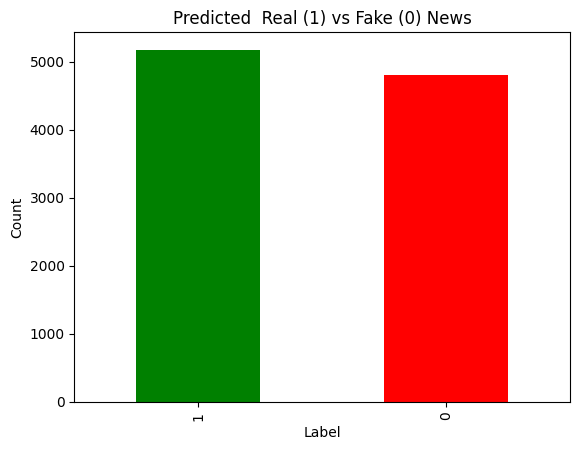

In [73]:
# Visualizing the content of Predicted  Real (1) vs Fake (0) News
import matplotlib.pyplot as plt

output['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title('Predicted  Real (1) vs Fake (0) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Logistic Regression

In [74]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model lr
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_tfidf, y_train)

# Prediction
y_pred_lr = lr.predict(X_test_tfidf)

# Saving the output
y_pred_lr = lr.predict(X_test_tfidf)
output_df = pd.DataFrame({'label': y_pred_lr, 'text': X_test['clean_text']})
output_df.to_csv("lr_model_predictions.csv", sep='\t', index=False, header=False)

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression: 0.9294393207436685
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3515
           1       0.91      0.94      0.93      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



Random Forest

In [75]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train_tfidf, y_train)

#Predict
y_pred_rf = rf.predict(X_test_tfidf)

#Save the output
output_df = pd.DataFrame({'label': y_pred_rf, 'text': X_test['clean_text']})
output_df.to_csv("rf_model_predictions.csv", sep='\t', index=False, header=False)

#Evaluation metrics
print("Random Forest:", rf.score(X_test_tfidf, y_test))


Random Forest: 0.9109939979505197


Support Vector Machine

In [77]:
# Linear Support Vector Machine
from sklearn.svm import LinearSVC

# Train Support Vector Machine
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm.predict(X_test_tfidf)

# Save the output
output_df = pd.DataFrame({'label': y_pred_svm, 'text': X_test['clean_text']})
output_df.to_csv("svm_model_predictions.csv", sep='\t', index=False, header=False)

# Evaluation metrics
print("SVM:", svm.score(X_test_tfidf, y_test))

SVM: 0.9333918899136291


Compare the accuracy of different models

Naive Bayes: 0.9245
Logistic Regression: 0.9294
Random Forest: 0.9110
SVM: 0.9334


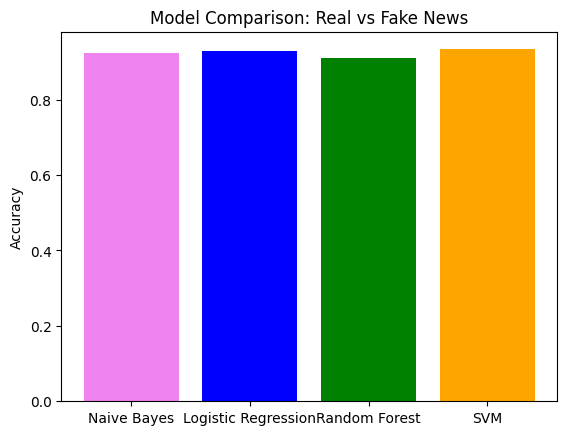

In [78]:
# Plot the results
models = {
    "Naive Bayes": nb_model,
    "Logistic Regression": lr,
    "Random Forest": rf,
    "SVM": svm
}

results = {}
for name, m in models.items():
    preds = m.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Bar chart
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color=['violet','blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison: Real vs Fake News")
plt.show()


Embeddings with Word2Vec

In [79]:
# Embeddings
# Download Word2Vec
!pip install gensim
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [80]:
# Load and prepare data
data = pd.read_csv("dataset/training_data_lowercase.csv", sep='\t', encoding='latin-1', names=['label', 'text'])
data = data.dropna()

# Apply the preprocess function to create the 'tokens' column
data['tokens'] = data['text'].apply(preprocess)

In [81]:
# Clean data
import re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', str(text))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.lower().split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return tokens

data['tokens'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
# Train Word2Vec model
w2v_model = Word2Vec(
    sentences=data['tokens'],
    vector_size=100,   # embedding dimension
    window=5,          # context window size
    min_count=2,       # ignore rare words
    workers=4,         # number of CPU threads
    sg=1               # 1 = skip-gram, 0 = CBOW
)


In [83]:
# Prepare data for NN - tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tokens'])
sequences = tokenizer.texts_to_sequences(data['tokens'])
X = pad_sequences(sequences, maxlen=200)
y = data['label']


In [84]:
# Build the embedding matrix
word_index = tokenizer.word_index
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


In [85]:
# Train test split
# Filter out the minority class 'ï»¿0' which has only one sample and causes stratification issues
data = data[data['label'] != 'ï»¿0']

# Redefine X and y after filtering the data
X = pad_sequences(tokenizer.texts_to_sequences(data['tokens']), maxlen=200)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert y_train and y_test to integer type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [86]:
# Build the neural network
lstm_model = Sequential([
    Embedding(
        input_dim=len(word_index) + 1,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=200,
        trainable=False   # freeze embeddings
    ),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.build(input_shape=(None, 200))

lstm_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 100)       │     1,944,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,070,469 (7.90 MB)

 Trainable params: 125,569 (490.50 KB)

 Non-trainable params: 1,944,900 (7.42 MB)

In [87]:
# Train the Embeddings LSTM model
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32,
    verbose=1
)


Epoch 1/5
854/854 ━━━━━━━━━━━━━━━━━━━━ 378s 438ms/step - accuracy: 0.8415 - loss: 0.3441 - val_accuracy: 0.9059 - val_loss: 0.2288
Epoch 2/5
854/854 ━━━━━━━━━━━━━━━━━━━━ 374s 438ms/step - accuracy: 0.8988 - loss: 0.2434 - val_accuracy: 0.9092 - val_loss: 0.2224
Epoch 3/5
854/854 ━━━━━━━━━━━━━━━━━━━━ 376s 441ms/step - accuracy: 0.9084 - loss: 0.2242 - val_accuracy: 0.9161 - val_loss: 0.2073
Epoch 4/5
854/854 ━━━━━━━━━━━━━━━━━━━━ 373s 437ms/step - accuracy: 0.9119 - loss: 0.2146 - val_accuracy: 0.9186 - val_loss: 0.2009
Epoch 5/5
854/854 ━━━━━━━━━━━━━━━━━━━━ 374s 438ms/step - accuracy: 0.9154 - loss: 0.2057 - val_accuracy: 0.9190 - val_loss: 0.1999


In [88]:
# Predict on validation data
validation = pd.read_csv("dataset/testing_data_lowercase_nolabels.csv", sep='\t', encoding='latin-1', names=['label', 'text'])
validation['tokens'] = validation['text'].apply(preprocess)
val_seq = tokenizer.texts_to_sequences(validation['tokens'])
X_val = pad_sequences(val_seq, maxlen=200)

preds = (lstm_model.predict(X_val) > 0.5).astype(int)
validation['label'] = preds

# Save the output
validation.to_csv("word2vec_output_file.csv", sep='\t', index=False)

312/312 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step


In [89]:
# Evaluate the Embeddings LSTM model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9200 - loss: 0.2022
Test Accuracy: 0.9190


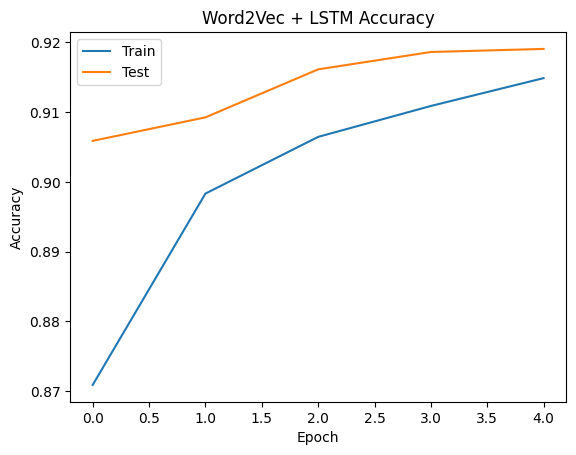

In [90]:
# Visualize train and test accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Word2Vec + LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Naive Bayes: 0.9245
Logistic R.: 0.9294
Random Forest: 0.9110
SVM: 0.9334
214/214 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step
Word2Vec + LSTM: 0.9190


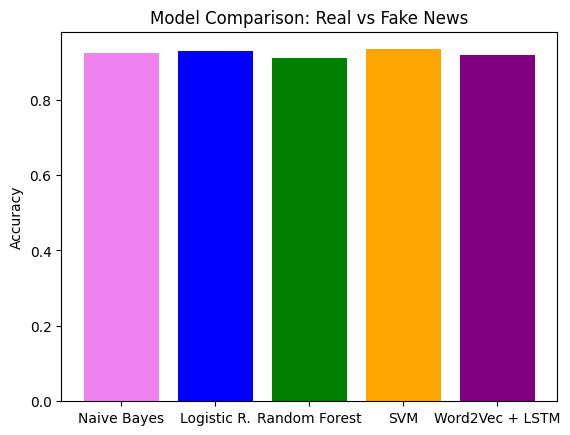

In [91]:
# Compare final resutls
models = {
    "Naive Bayes": nb_model,
    "Logistic R.": lr,
    "Random Forest": rf,
    "SVM": svm,
    "Word2Vec + LSTM": lstm_model
}

results = {}
for name, m in models.items():
    if name == "Word2Vec + LSTM":
        # For Keras model, predict probabilities, convert to binary labels, and flatten
        preds = (m.predict(X_test) > 0.5).astype(int).flatten()
    else:
        # For other models, predict directly and convert to int
        preds = m.predict(X_test_tfidf).astype(int)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Bar chart
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color=['violet','blue','green','orange','purple'])
plt.ylabel("Accuracy")
plt.title("Model Comparison: Real vs Fake News")
plt.show()

Based on the accuracy comparison above, the winner is SVM. It was fast and achieved highest accuracy. The Word3Vec LSTM Model, although more complex didn't deliver better results. Logistic Regression performed better than Naive Bayes and Random Forest.